In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from fooof import FOOOF

In [23]:
%matplotlib inline

In [24]:
# load dp moments and corresponding eeg
#dps = np.load('DIPOLEMOMENT_Seed1234.npy')
#dps = np.load('DIPOLEMOMENT_25s_correct_placement_Seed12345_download.npy')
#eegs = np.load('Mazza2023/data/simulations_processed/SST_2.npy', allow_pickle=True).item(0)
eegs = np.load('Test-EEG-Signal_woT.npy')

#signal = eegs[seed]['ts_raw']
signal = eegs[0]

In [25]:
print(len(signal))

400000


In [26]:

fs = 40000
s = int(2 * fs)
e = int(2.5 * fs)


#e = 300001
#s = e - 5000

times = np.arange(0,30000,30000/len(signal)) # adjust to your simulation times

In [27]:
# #######################
# # Plot dp moments & EEG
# #######################
# 
# fig, axes = plt.subplots(figsize=(12,12),ncols=4,nrows=4, sharey='row')
# 
# 
# colors = {'HL23PN1':'k','HL23MN1':'red','HL23BN1':'green','HL23VN1':'gold'}
# # plot eeg
# _ = [axes[0][i].plot(times[s:e],signal[s:e], lw=0.5) for i in range(4)] # for visual comparison, same signal
# # plot dipolemoments 
# for c,cellname in enumerate(dps.dtype.names):
#     for dp_comp in [0,1,2]: # x, y, z components of dipole
#         axes[dp_comp+1][c].plot(times[s:e],dps[cellname][:,dp_comp][s:e], color=colors[cellname],label=cellname, lw=.5)
#     axes[1][c].set_title(cellname)
#     
# # visual formatting
# [ax.spines[spine].set_visible(False) for spine in ['top','right'] for row in axes for ax in row]
# [ax.set_xticklabels('') for row in axes[:-1] for ax in row]
# [ax.set_xlabel('Time (ms)') for ax in axes[-1]]
# 
# axes[0][0].set_ylabel('EEG potential (mV)')
# axes[1][0].set_ylabel('X dp moment (nA*µm)')
# axes[2][0].set_ylabel('Y dp moment (nA*µm)')
# _ = axes[3][0].set_ylabel('Z dp moment (nA*µm)')
# 
# #plt.savefig('EEG-Dipole-components.png',dpi=200)

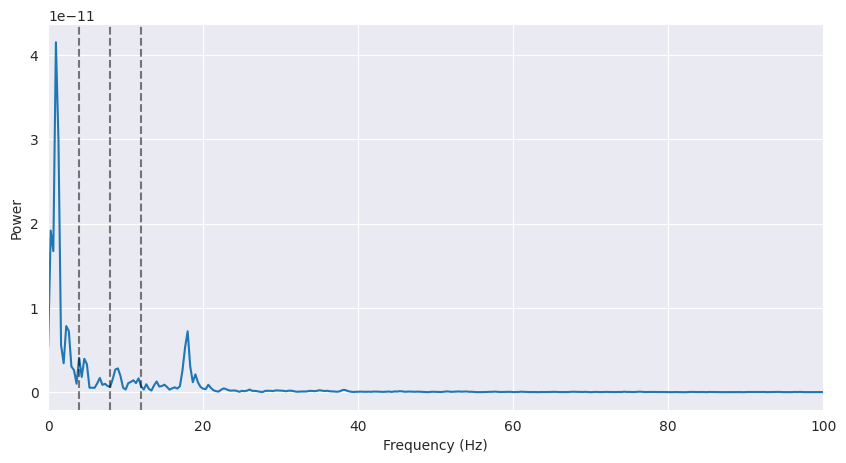

In [28]:
#######################
# Calc & plot PSD
#######################

fig,axes = plt.subplots(figsize=(10,5))

ts = signal.flatten()[2*fs:] # cut transient
nperseg = fs*3

freq_wel, ps_wel = ss.welch(ts,fs=fs,nperseg=nperseg)


axes.plot(freq_wel,ps_wel)
#axes.loglog(freq_wel,ps_wel)
axes.set_xlim(0,100)
axes.set_ylabel("Power")
axes.set_xlabel('Frequency (Hz)')
[axes.axvline(l,ls='--',color='k',alpha=.5) for l in [4,8,12]]
_ = [axes.spines[spine].set_visible(False) for spine in ['top','right']]

#plt.savefig('EEG-Spectrum_0-100Hz.png',dpi=200)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 30 - 80 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -10.1977, 1.9277                                         
                                                                                                  
                                       22 peaks were found:                                       
          

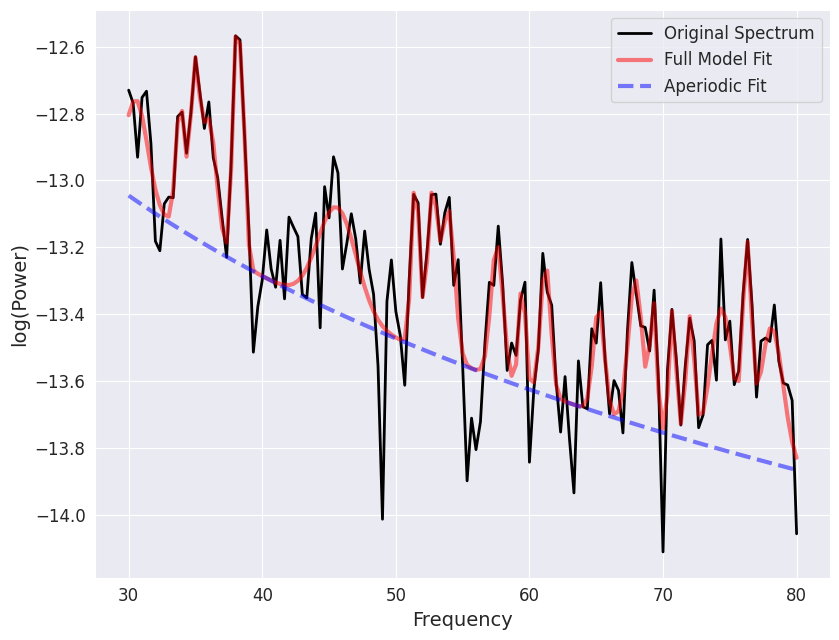

In [29]:

fm = FOOOF()
freq_range = [30, 80]
fm.report(freq_wel, ps_wel, freq_range)
#plt.savefig('FOOOF_30-80Hz.png', dpi=200)





/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 4 - 30 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.0269, 1.2813                                         
                                                                                                  
                                       3 peaks were found:                                        
          

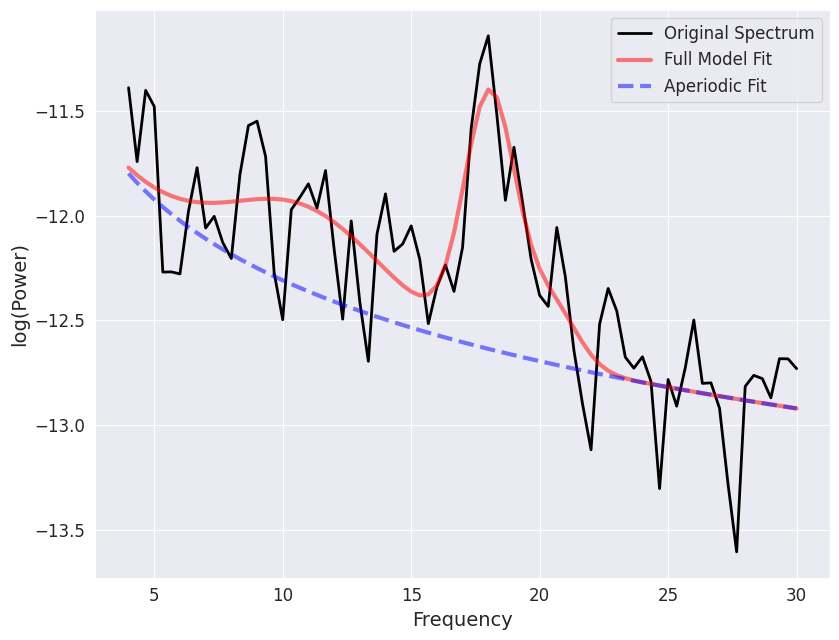

In [30]:
fm = FOOOF(peak_width_limits=[2, 6], max_n_peaks=3, min_peak_height=0, peak_threshold=2, aperiodic_mode='fixed')
freq_range = [4, 30]
fm.fit(freq_wel, ps_wel, freq_range)
fm.report(freq_wel, ps_wel, freq_range)  



/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 30 - 80 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -10.0486, 1.9564                                         
                                                                                                  
                                       3 peaks were found:                                        
          

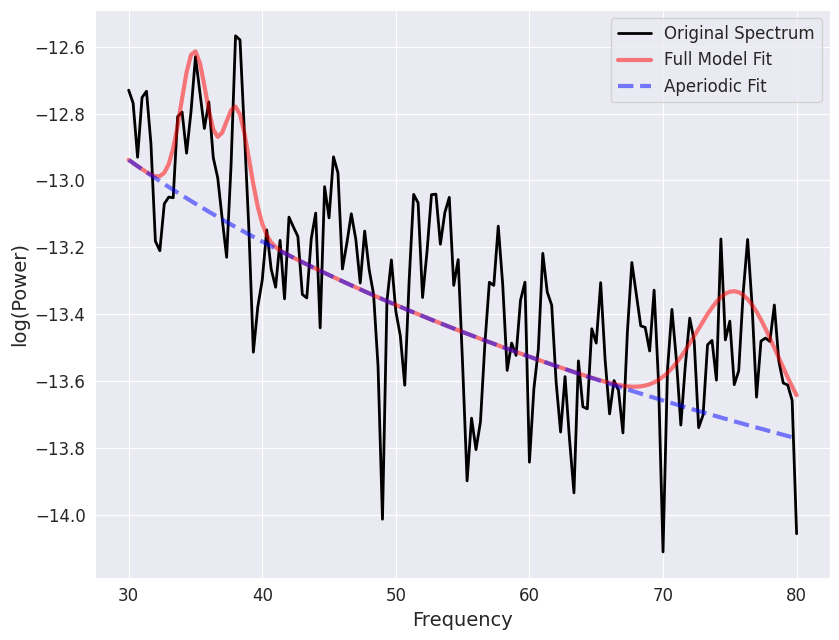

In [31]:
fm = FOOOF(peak_width_limits=[2, 6], max_n_peaks=3, min_peak_height=0, peak_threshold=2, aperiodic_mode='fixed')
freq_range = [30, 80]
fm.fit(freq_wel, ps_wel, freq_range)
fm.report(freq_wel, ps_wel, freq_range)  


/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/common.py:49: RuntimeWarning: invalid value encountered in scalar divide
  t2 = c / q
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:234: RuntimeWarning: divide by zero encountered in divide
  Delta = norm(x0 * scale_inv / v**0.5)
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: invalid value encountered in scalar divide
  alpha *= Delta / Delta_new
/home/jash/miniconda3/envs/ba_env/lib/python3.11/site-packages/scipy/optimize/_lsq/common

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 4 - 80 Hz                        
                                 Frequency Resolution is 0.33 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -10.6625, 1.5742                                         
                                                                                                  
                                       3 peaks were found:                                        
          

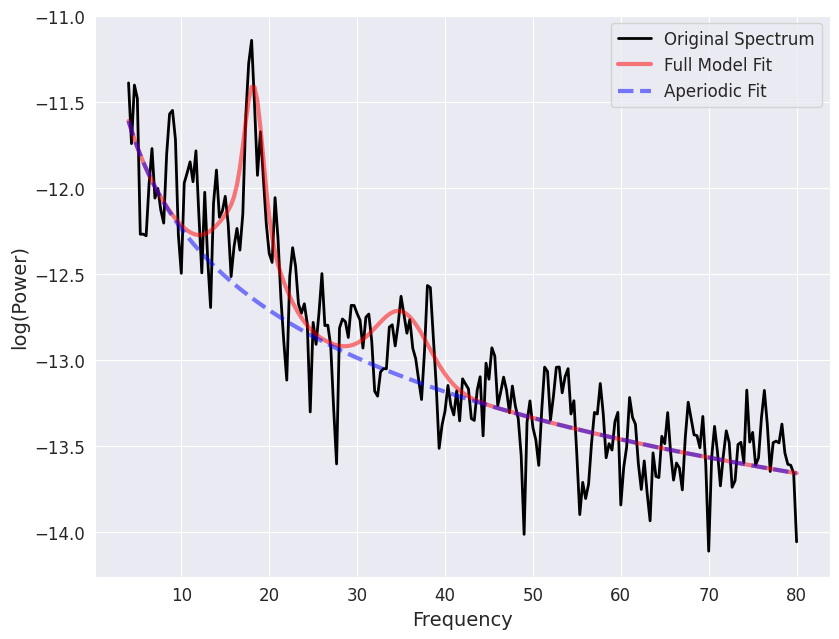

In [32]:
fm = FOOOF(peak_width_limits=[2, 6], max_n_peaks=3, min_peak_height=0, peak_threshold=2, aperiodic_mode='fixed')
freq_range = [4, 80]
fm.fit(freq_wel, ps_wel, freq_range)
fm.report(freq_wel, ps_wel, freq_range)  
